In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
def test_stationarity(name,timeseries):
    print(f'Results of Dickey-Fuller Test for {name}:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    return dftest[1]#p-value

In [3]:
def tsplot(name, y, lags=None, figsize=(14, 8), style='bmh'):
    pval=test_stationarity(name,y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title(f'{name}')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return pval

In [4]:
series_femalebirths = pd.read_csv("Series\daily-total-female-births-in-cal.csv")['Count'].dropna()
series_airline = pd.read_csv("Series\international-airline-passengers.csv")['Count'].dropna()
series_temperature = pd.read_csv("Series\mean-monthly-air-temperature-deg.csv")['Deg'].dropna()
series_robberies = pd.read_csv("Series\monthly-boston-armed-robberies-j.csv")['Count'].dropna()
series_sales= pd.read_csv("Series\monthly-sales-of-company-x-jan-6.csv")['Count'].dropna()
series_dowjones = pd.read_csv("Series\weekly-closings-of-the-dowjones-.csv")['Close'].dropna()
series_femalebirths.head()

0    35
1    32
2    30
3    31
4    44
Name: Count, dtype: int64

уберем изменение дисперсии при помощи преобразования Бокса-Кокса


In [6]:
series_femalebirths = pd.Series(boxcox(series_femalebirths, 0))
series_airline = pd.Series(boxcox(series_airline, 0))
series_temperature = pd.Series(boxcox(series_temperature, 0))
series_robberies = pd.Series(boxcox(series_robberies, 0))
series_sales = pd.Series(boxcox(series_sales, 0))
series_dowjones = pd.Series(boxcox(series_dowjones, 0))


In [7]:
lst_ser={'series_femalebirths':series_femalebirths,
'series_airline':series_airline,
'series_temperature':series_temperature ,
'series_robberies':series_robberies,
'series_sales':series_sales,
'series_dowjones':series_dowjones,
'series_femalebirths':series_femalebirths
}

In [8]:
for k,ser in lst_ser.items():
    print(ser.head())
    #print(ser.info())

0    3.555348
1    3.465736
2    3.401197
3    3.433987
4    3.784190
dtype: float64
0    4.718499
1    4.770685
2    4.882802
3    4.859812
4    4.795791
dtype: float64
0    3.703768
1    3.708682
2    3.793239
3    3.843744
4    3.990834
dtype: float64
0    3.713572
1    3.663562
2    3.912023
3    3.688879
4    3.761200
dtype: float64
0    5.036953
1    4.564348
2    4.290459
3    3.891820
4    3.583519
dtype: float64
0    6.791435
1    6.804393
2    6.789546
3    6.788724
4    6.755105
dtype: float64


In [9]:
lst_ser['series_femalebirths'].head()

0    3.555348
1    3.465736
2    3.401197
3    3.433987
4    3.784190
dtype: float64

Results of Dickey-Fuller Test for series_femalebirths:
Test Statistic                  -4.364099
p-value                          0.000343
#Lags Used                       7.000000
Number of Observations Used    357.000000
Critical Value (1%)             -3.448801
Critical Value (5%)             -2.869670
Critical Value (10%)            -2.571101
dtype: float64
Гипотеза H0 о нестационарности series_femalebirths отвергается, так как P-value==0.0003434029771040082 < 5%
Results of Dickey-Fuller Test for series_airline:
Test Statistic                  -2.156028
p-value                          0.222590
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Results of Dickey-Fuller Test for series_temperature:
Test Statistic                  -3.859318
p-value                          0.002356
#Lags Used                     

i:\Users\Konst\anaconda3\envs\my_3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


Results of Dickey-Fuller Test for series_dowjones:
Test Statistic                  -1.194087
p-value                          0.676134
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


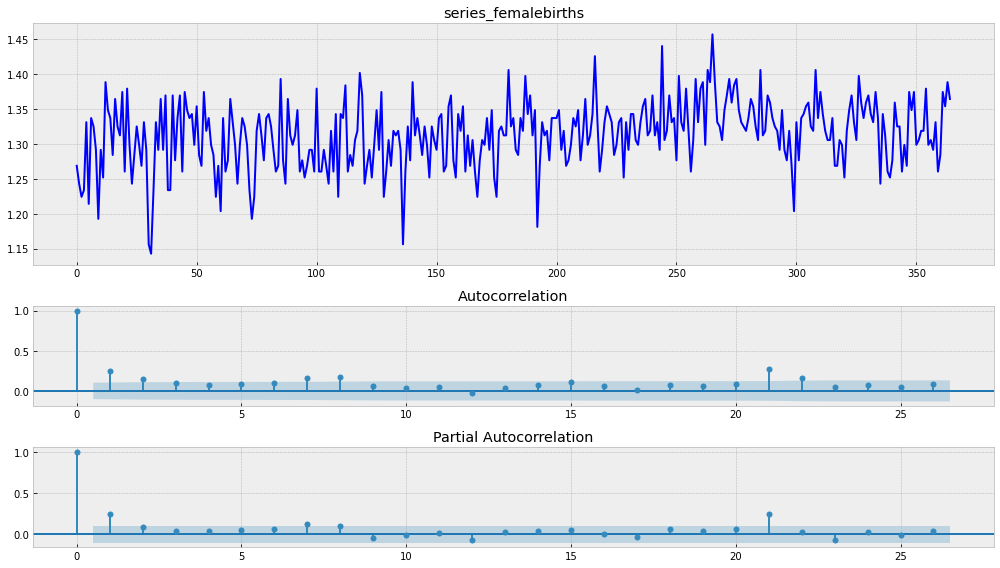

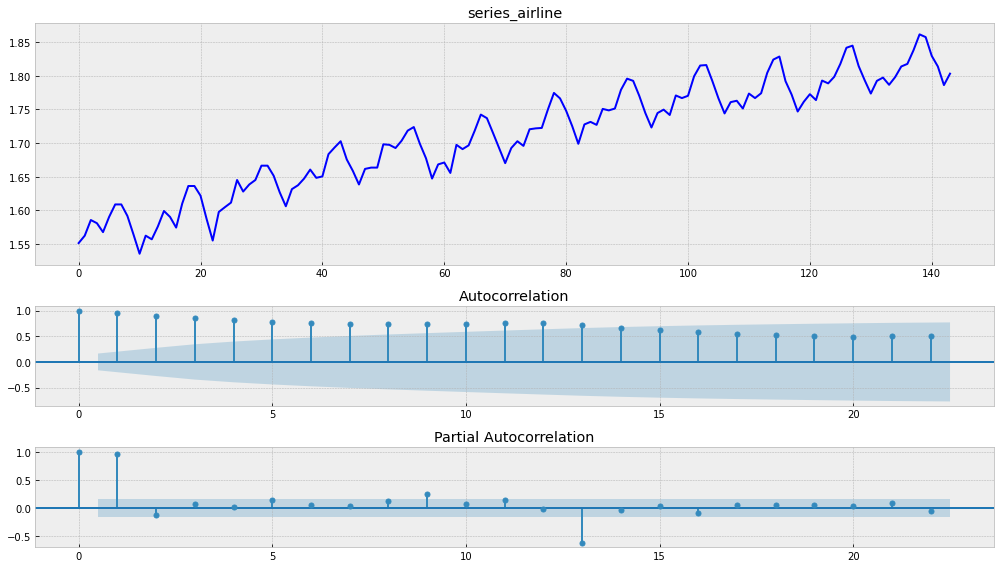

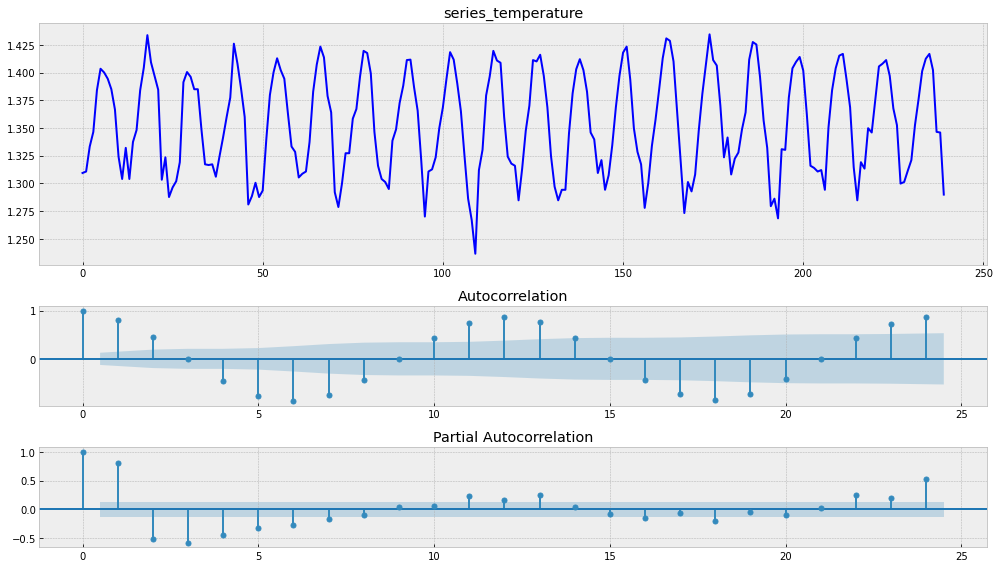

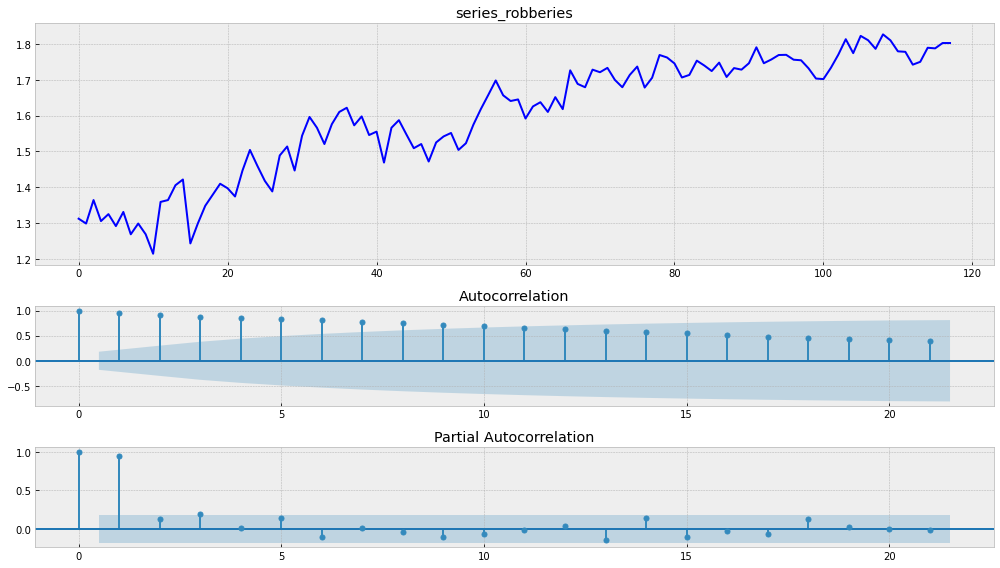

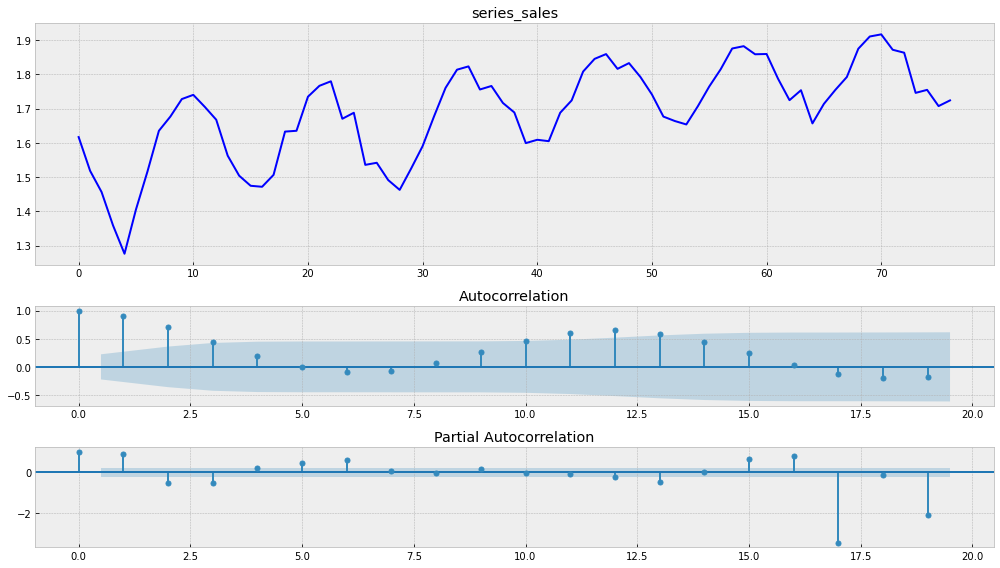

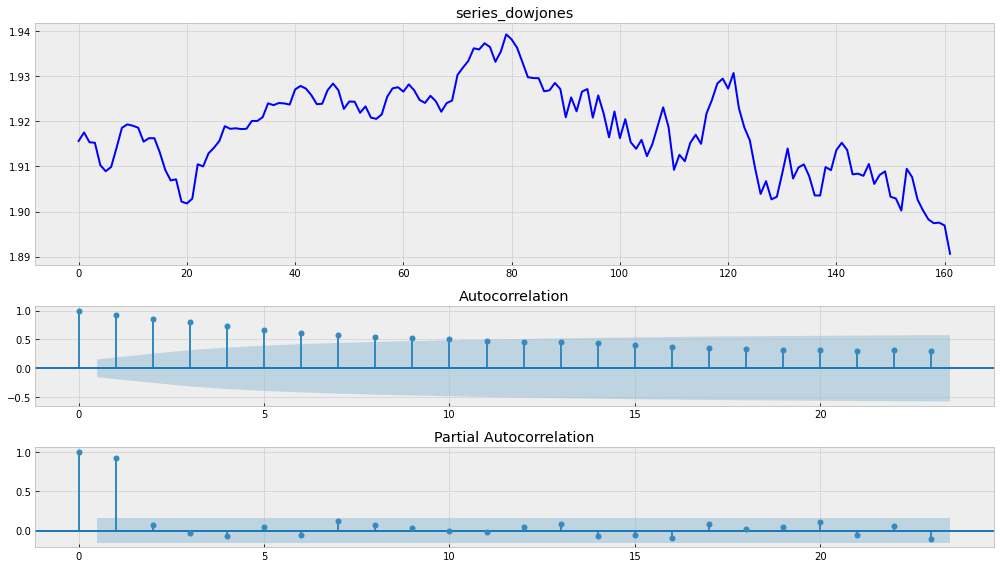

In [10]:
dct_ln={}
for k,ser in lst_ser.items():
    ser_ln=np.log(ser)
    loc_p_v=tsplot(k,ser_ln)
    if(loc_p_v<0.05):
        dct_ln[k]=ser_ln
        print(f'Гипотеза H0 о нестационарности {k} отвергается, так как P-value=={loc_p_v} < 5%')


In [295]:
del_stacion=[]
for k in dct_ln.keys():
    print(f'После логарифмирования, для ряда {k} гипотеза о нестационарности не подвердилась ')
    del_stacion.append(k)
for i in del_stacion:
    del(lst_ser[i])

print(f'\nДля рядов {[x for x in lst_ser.keys()]} \nгипотеза о нестационарности пока что подвердилась')

После логарифмирования, для ряда series_femalebirths гипотеза о нестационарности не подвердилась 
После логарифмирования, для ряда series_temperature гипотеза о нестационарности не подвердилась 

Для рядов ['series_airline', 'series_robberies', 'series_sales', 'series_dowjones'] 
гипотеза о нестационарности пока что подвердилась


### Продифференцируем 'series_airline', 'series_robberies', 'series_sales', 'series_dowjones'

In [296]:
series_femalebirths = pd.read_csv("Series\daily-total-female-births-in-cal.csv")['Count'].dropna()
series_airline = pd.read_csv("Series\international-airline-passengers.csv")['Count'].dropna()
series_temperature = pd.read_csv("Series\mean-monthly-air-temperature-deg.csv")['Deg'].dropna()
series_robberies = pd.read_csv("Series\monthly-boston-armed-robberies-j.csv")['Count'].dropna()
series_sales= pd.read_csv("Series\monthly-sales-of-company-x-jan-6.csv")['Count'].dropna()
series_dowjones = pd.read_csv("Series\weekly-closings-of-the-dowjones-.csv")['Close'].dropna()

In [297]:
series_femalebirths = pd.Series(boxcox(series_femalebirths, 0))
series_airline = pd.Series(boxcox(series_airline, 0))
series_temperature = pd.Series(boxcox(series_temperature, 0))
series_robberies = pd.Series(boxcox(series_robberies, 0))
series_sales = pd.Series(boxcox(series_sales, 0))
series_dowjones = pd.Series(boxcox(series_dowjones, 0))

Results of Dickey-Fuller Test for series_airline:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64
Results of Dickey-Fuller Test for series_robberies:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64
Гипотеза H0 о нестационарности series_robberies отвергается, так как P-value==2.3786024417437257e-11 < 5%
Results of Dickey-Fuller Test for series_sales:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                    

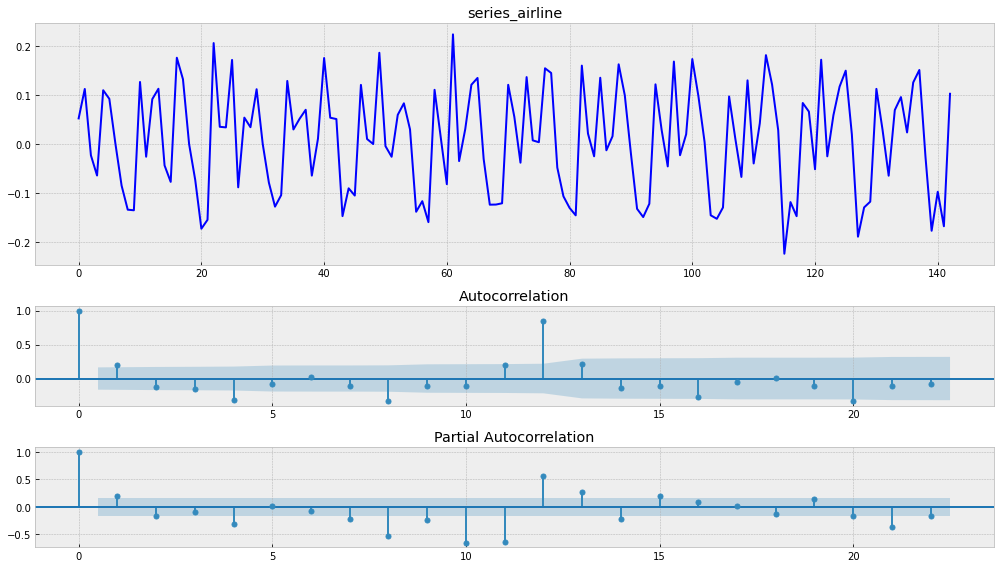

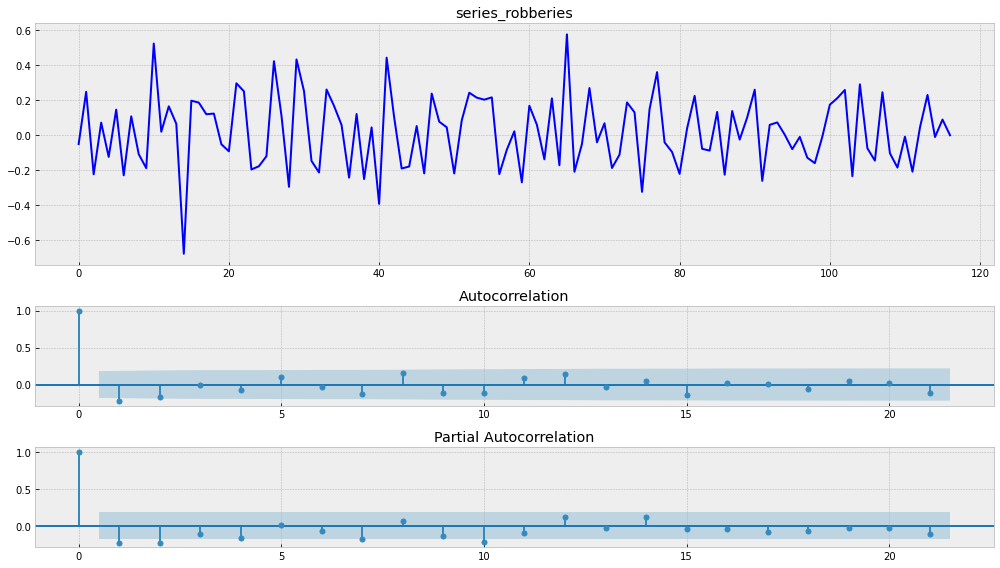

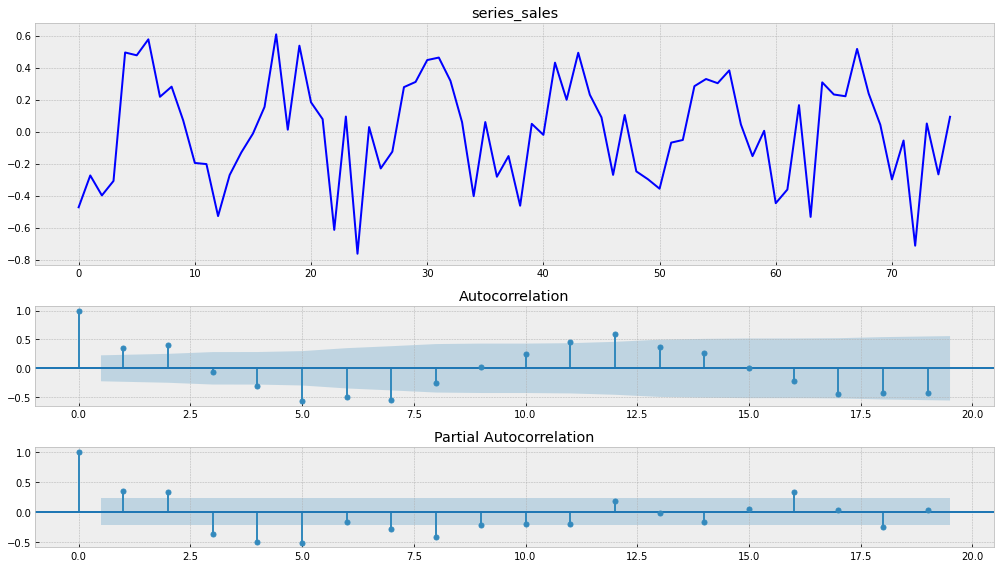

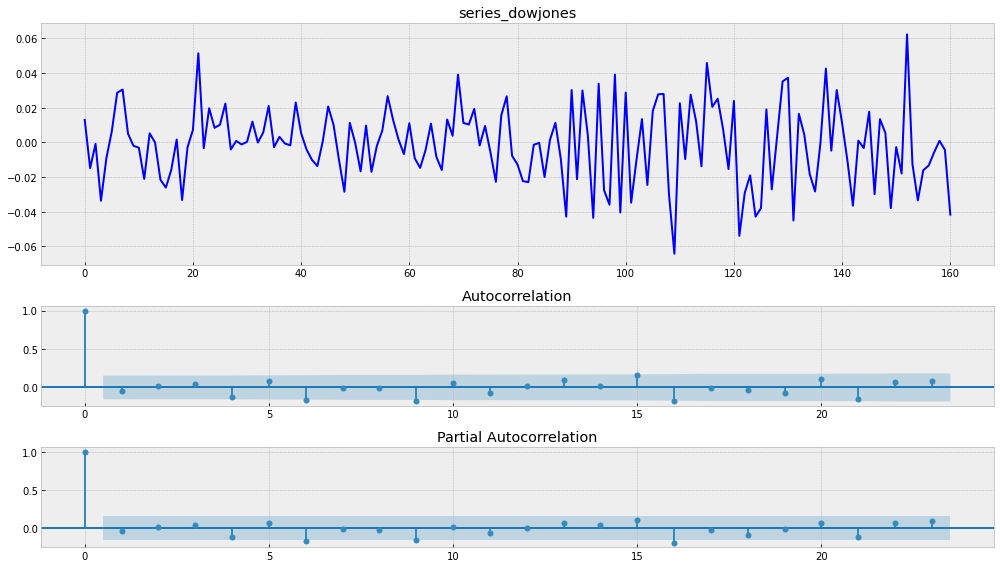

In [298]:


dct_diff={}
for k,ser in lst_ser.items():
    ser_diff=np.diff(ser,1)
    loc_p_v=tsplot(k,ser_diff)
    if(loc_p_v<0.05):
        dct_diff[k]=ser_diff
        print(f'Гипотеза H0 о нестационарности {k} отвергается, так как P-value=={loc_p_v} < 5%')



In [299]:
del_diff=[]
for k in dct_diff.keys():
    print(f'После дифференцирования, для ряда {k} гипотеза о нестационарности не подвердилась ')
    del_diff.append(k)
for i in del_diff:
    del(lst_ser[i])

После дифференцирования, для ряда series_robberies гипотеза о нестационарности не подвердилась 
После дифференцирования, для ряда series_sales гипотеза о нестационарности не подвердилась 
После дифференцирования, для ряда series_dowjones гипотеза о нестационарности не подвердилась 


In [300]:
print(f'\nДля рядов {[x for x in lst_ser.keys()]} \nгипотеза о нестационарности пока что подвердилась')


Для рядов ['series_airline'] 
гипотеза о нестационарности пока что подвердилась


In [301]:
series_femalebirths = pd.read_csv("Series\daily-total-female-births-in-cal.csv")['Count'].dropna()
series_airline = pd.read_csv("Series\international-airline-passengers.csv")['Count'].dropna()
series_temperature = pd.read_csv("Series\mean-monthly-air-temperature-deg.csv")['Deg'].dropna()
series_robberies = pd.read_csv("Series\monthly-boston-armed-robberies-j.csv")['Count'].dropna()
series_sales= pd.read_csv("Series\monthly-sales-of-company-x-jan-6.csv")['Count'].dropna()
series_dowjones = pd.read_csv("Series\weekly-closings-of-the-dowjones-.csv")['Close'].dropna()

In [302]:
series_femalebirths = pd.Series(boxcox(series_femalebirths, 0))
series_airline = pd.Series(boxcox(series_airline, 0))
series_temperature = pd.Series(boxcox(series_temperature, 0))
series_robberies = pd.Series(boxcox(series_robberies, 0))
series_sales = pd.Series(boxcox(series_sales, 0))
series_dowjones = pd.Series(boxcox(series_dowjones, 0))

Results of Dickey-Fuller Test for series_dowjones:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


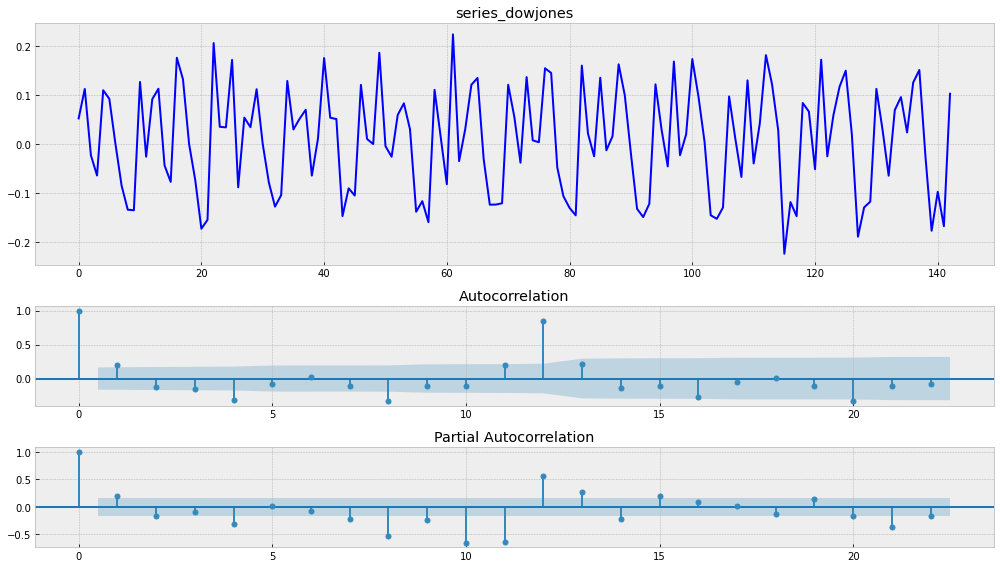

In [303]:
series_airline=np.diff(series_airline,1)

loc_p_v=tsplot(k,series_airline)
if(loc_p_v<0.05):
    print(f'Гипотеза H0 о нестационарности series_airline отвергается, так как P-value=={loc_p_v} < 5%')

Results of Dickey-Fuller Test for series_dowjones:
Test Statistic                  -2.795291
p-value                          0.058950
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


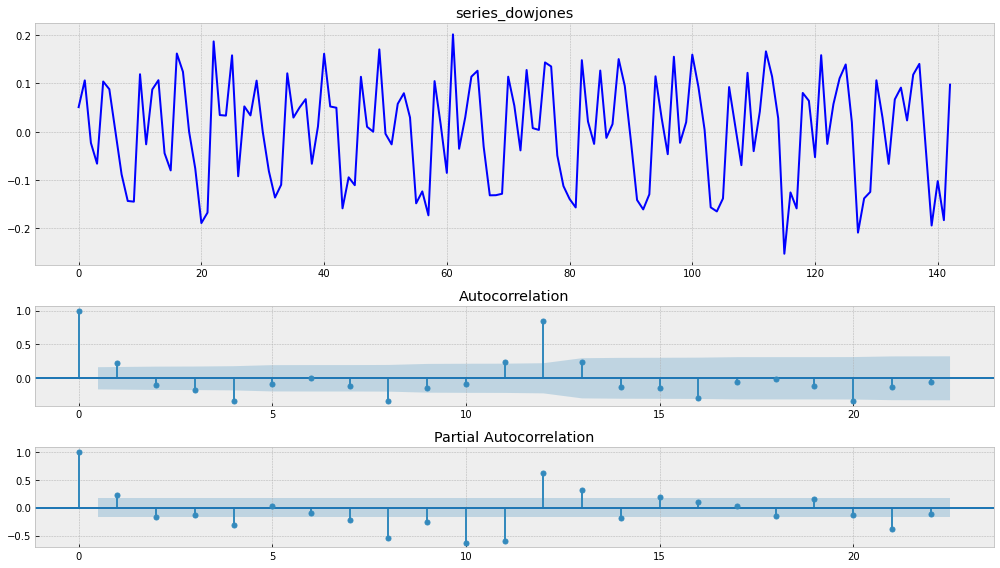

In [304]:


series_airline=np.log(series_airline+1)
loc_p_v=tsplot(k,series_airline)
if(loc_p_v<0.05):
    print(f'Гипотеза H0 о нестационарности series_airline отвергается, так как P-value=={loc_p_v} < 5%')



Results of Dickey-Fuller Test for series_dowjones:
Test Statistic                -8.099671e+00
p-value                        1.310117e-12
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


i:\Users\Konst\anaconda3\envs\my_3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


Гипотеза H0 о нестационарности series_airline отвергается, так как P-value==1.3101168564084892e-12 < 5%


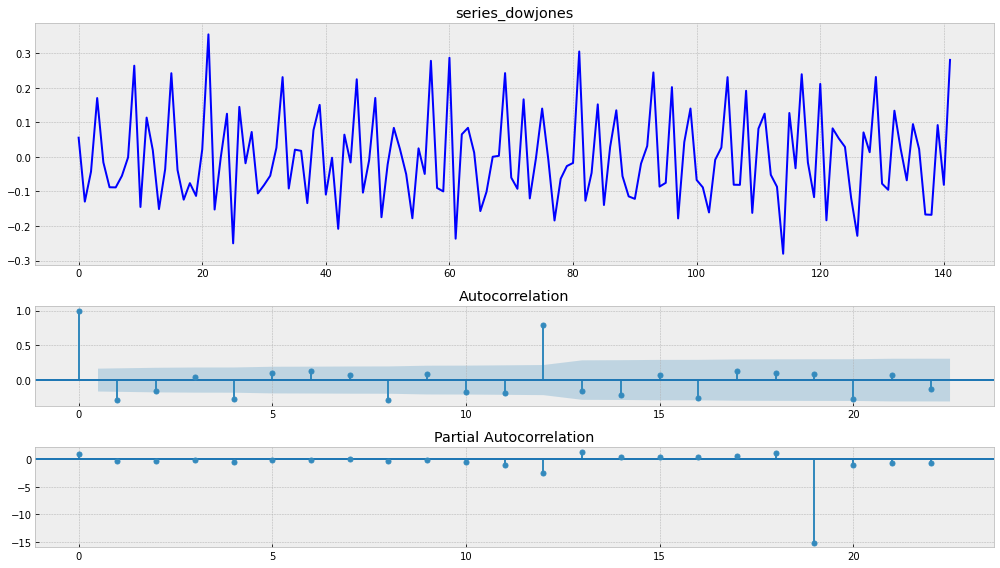

In [305]:
series_airline=np.diff(series_airline,1)
loc_p_v=tsplot(k,series_airline)
if(loc_p_v<0.05):
    print(f'Гипотеза H0 о нестационарности series_airline отвергается, так как P-value=={loc_p_v} < 5%')